In [1]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

In [2]:
### Experiment 2: Model architecture tuning

In [3]:
# fixed parameters
lr = 0.1
momentum = 0.9
mini_batch_size = 50
num_epochs = 300

# variable parameters
num_hidden_min, num_hidden_max, num_hidden_n = 2,512, 9
num_layers_min, num_layers_max, num_layers_n = 2, 6, 5


# experiment parameters
seed = 0
num_trials = 45

In [4]:
#### Random search

In [5]:
rd_res=[]
for i in range(10):
    parameters_range = {'lr': (lr, lr, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 'fixed'),
                    'momentum': (momentum, momentum, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, 'discrete_loguniform_2'),
                    'num_layers': (num_layers_min, num_layers_max, 'discrete'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
    parameters = random_hyperparameters(parameters_range,num_trials, i)
    rd_results = random_search(parameters)
    #visualize_experiment(rd_results)
    rd_res.append(rd_results)

In [11]:
#### Grid search

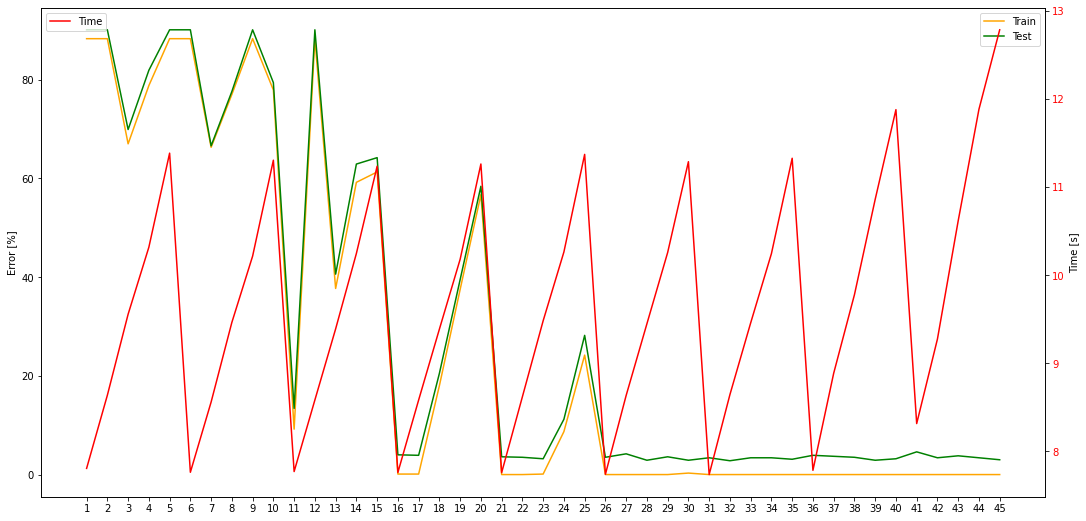

In [6]:
parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_linspace'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_logspace_2'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)
gd_results = grid_search(parameters)
visualize_experiment(gd_results,'grid2-')

In [14]:
#### Bayesian optimisation

In [7]:
bo_res=[]
for i in range(10):
    try:
        parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_logspace_2'),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_linspace'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
        bo_optimizer = TuneBO( parameters_range=parameters_range,offline=False)
        bo_optimizer.run(num_evals=40)
        bo_results=bo_optimizer.evaluation_history
        #visualize_experiment(bo_results)
        bo_res.append(bo_results)
    except BaseException:
        print('exception')

 C:\Users\Doo\anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:137: RuntimeWarning:overflow encountered in square
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:138: RuntimeWarning:invalid value encountered in add
 C:\Users\Doo\PycharmProjects\Opt_ML_course_project\bayesian_optimizer.py:232: RuntimeWarning:invalid value encountered in sqrt
 C:\Users\Doo\PycharmProjects\Opt_ML_course_project\bayesian_optimizer.py:234: RuntimeWarning:invalid value encountered in sqrt
 C:\Users\Doo\anaconda3\lib\site-packages\GPy\kern\src\stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


[ 20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340 360
 380 400 420 440]


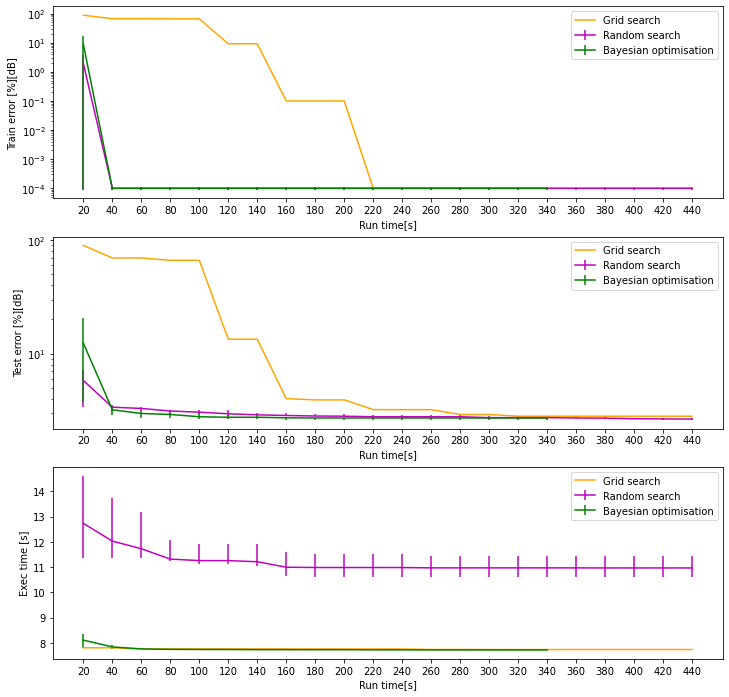

In [17]:
plot_all_results(rd_res, [gd_results], bo_res)